# 05 Implement a function that takes a sound wave and reduces the noise in it. You may use any technique, maybe think of something yourself.

In [3]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

## Methodology

* We can reduce noise in a sound file by taking fourier transform of the sound wave. 
* If we take the asbsolute value of the fourier transform, it will give us a frequency power spectrum. 
* For the frequencies that was in our noise free sound, we will see spike in those frequencies in frequency power spectrum plot. 
* If we take a threshold power and set power to zero if for a frequency, power is less than threshold power - we will denoise the signal. This will eliminate the noises as the noises will make small spike in y-axis(power). 
* Then we will have to inverse fourier tranform to get the de-noised signal

## Example Here

For the purpose of demonstration, we will add Gaussian noise to a signal. Then pass it to our denoise function. The denoise function will fourier transform the signal, filter out low powered frequency, then inverse fourier transform to generate the noise free signal. 

### Signal Generation

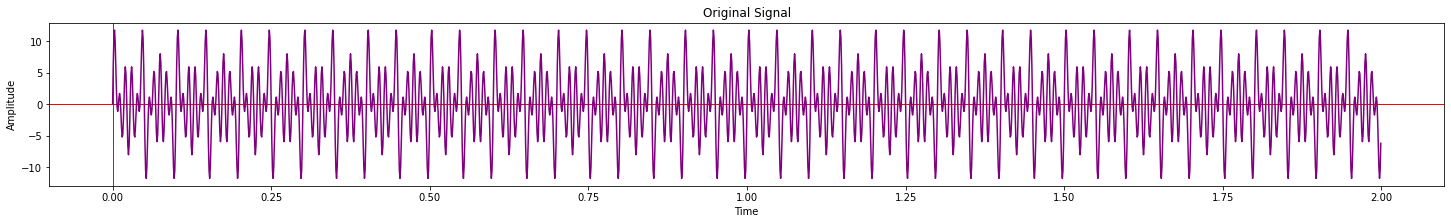

In [4]:
t = np.arange(0, 2, 0.001)

# signal 1
x1 = 2 * np.sin(2*np.pi*30*t)

# signal 2

x2 = 3 * np.sin(2 * np.pi * 50 * t)

# signal 3

x3 = 4 * np.sin(2 * np.pi * 70 * t)

# signal 3

x4 = 5 * np.sin(2 * np.pi * 110 * t)

# Combined Signal

x = x1 + x2 + x3 + x4

plt.figure(figsize=(25,3))
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.axvline(linewidth = '1', color = 'r')
plt.axhline(linewidth = '1', color = 'r')
plt.plot(t, x, color='purple')

### Adding noise

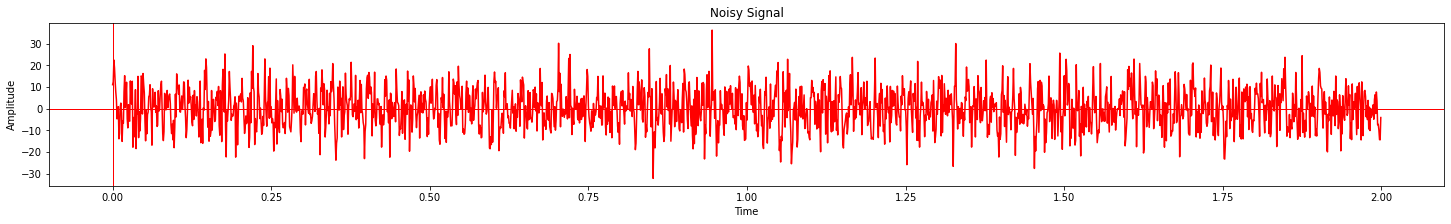

In [5]:
noisy = x + 7.5*np.random.randn(len(t))

plt.figure(figsize=(25,3))
plt.title('Noisy Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.axvline(linewidth = '1', color = 'r')
plt.axhline(linewidth = '1', color = 'r')
plt.plot(t, noisy, color='red')

### Denoise Function

In [6]:
def denoise(signal):
  n = np.arange(len(signal))
  # Fourier Transform
  dft = np.fft.fft(noisy) 

  #plot power frequency spectrum
  plt.figure(figsize=(25,3))
  plt.plot(n, abs(dft))
  plt.title('Power Frequency Spectrum')
  plt.xlabel('Frequency(Hz)')
  plt.ylabel('Power')
  
  # filter
  filtered_signal = (abs(dft)>1200) * dft

  plt.figure(figsize=(25,3))
  plt.plot(n, abs(filtered_signal))
  plt.title('Filtered Power Frequency Spectrum')
  plt.xlabel('Frequency(Hz)')
  plt.ylabel('Power')

  # return denoised signal(inverse dft of filtered signal)
  return np.fft.ifft(filtered_signal)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


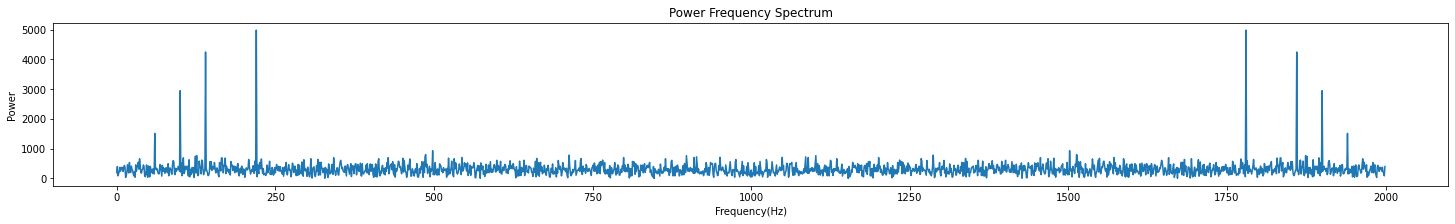

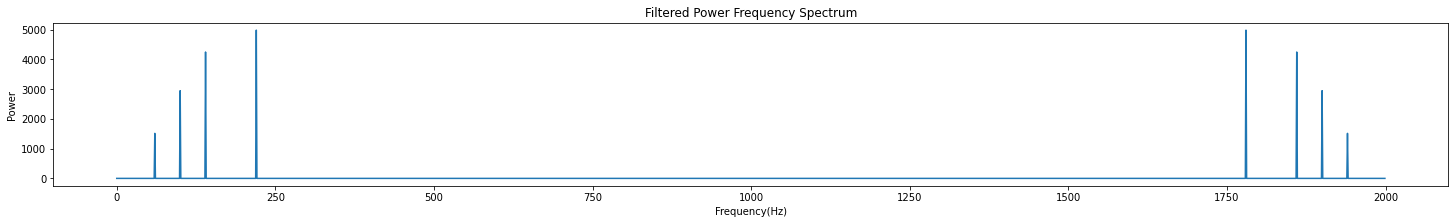

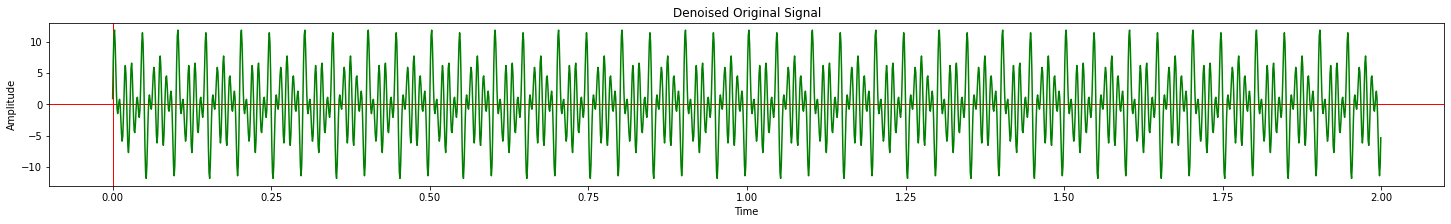

In [7]:
denoised_signal = denoise(noisy)

plt.figure(figsize=(25,3))
plt.title('Denoised Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.axvline(linewidth = '1', color = 'r')
plt.axhline(linewidth = '1', color = 'r')
plt.plot(t, denoised_signal, color='green')